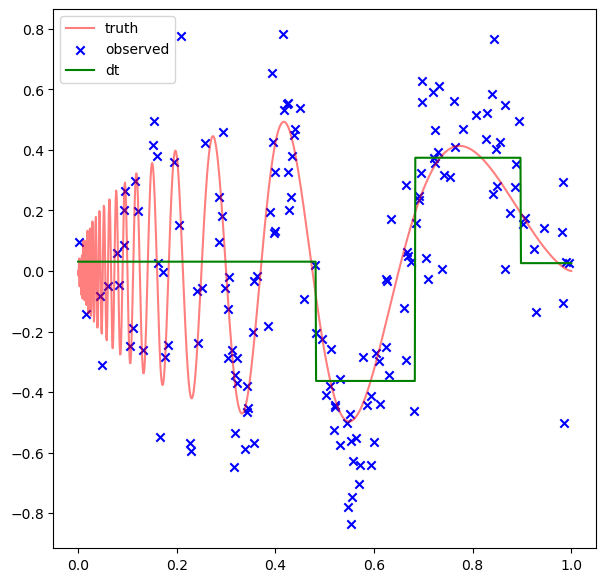

In [7]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np 
import matplotlib.pyplot as plt

def f(x):
    t1 = np.sqrt(x * (1-x))
    t2 = (2.1 * np.pi) / (x + 0.05)
    t3 = np.sin(t2)
    return t1*t3

def f_sampler(f, n=100, sigma=0.05):
    xvals = np.random.uniform(low=0, high=1, size=n)
    yvals = f(xvals) + sigma * np.random.normal(0,1,size=n)

    return xvals, yvals

np.random.seed(123)
X, y = f_sampler(f, 160, sigma=0.2)
X = X.reshape(-1,1)

fig = plt.figure(figsize=(7,7))
dt = DecisionTreeRegressor(max_depth=2).fit(X,y)
xx = np.linspace(0,1,1000)
plt.plot(xx, f(xx), alpha=0.5, color='red', label='truth')
plt.scatter(X,y, marker='x', color='blue', label='observed')
plt.plot(xx, dt.predict(xx.reshape(-1,1)), color='green', label='dt')
plt.legend()
#plt.savefig("example.png", dpi=400)        
plt.show()

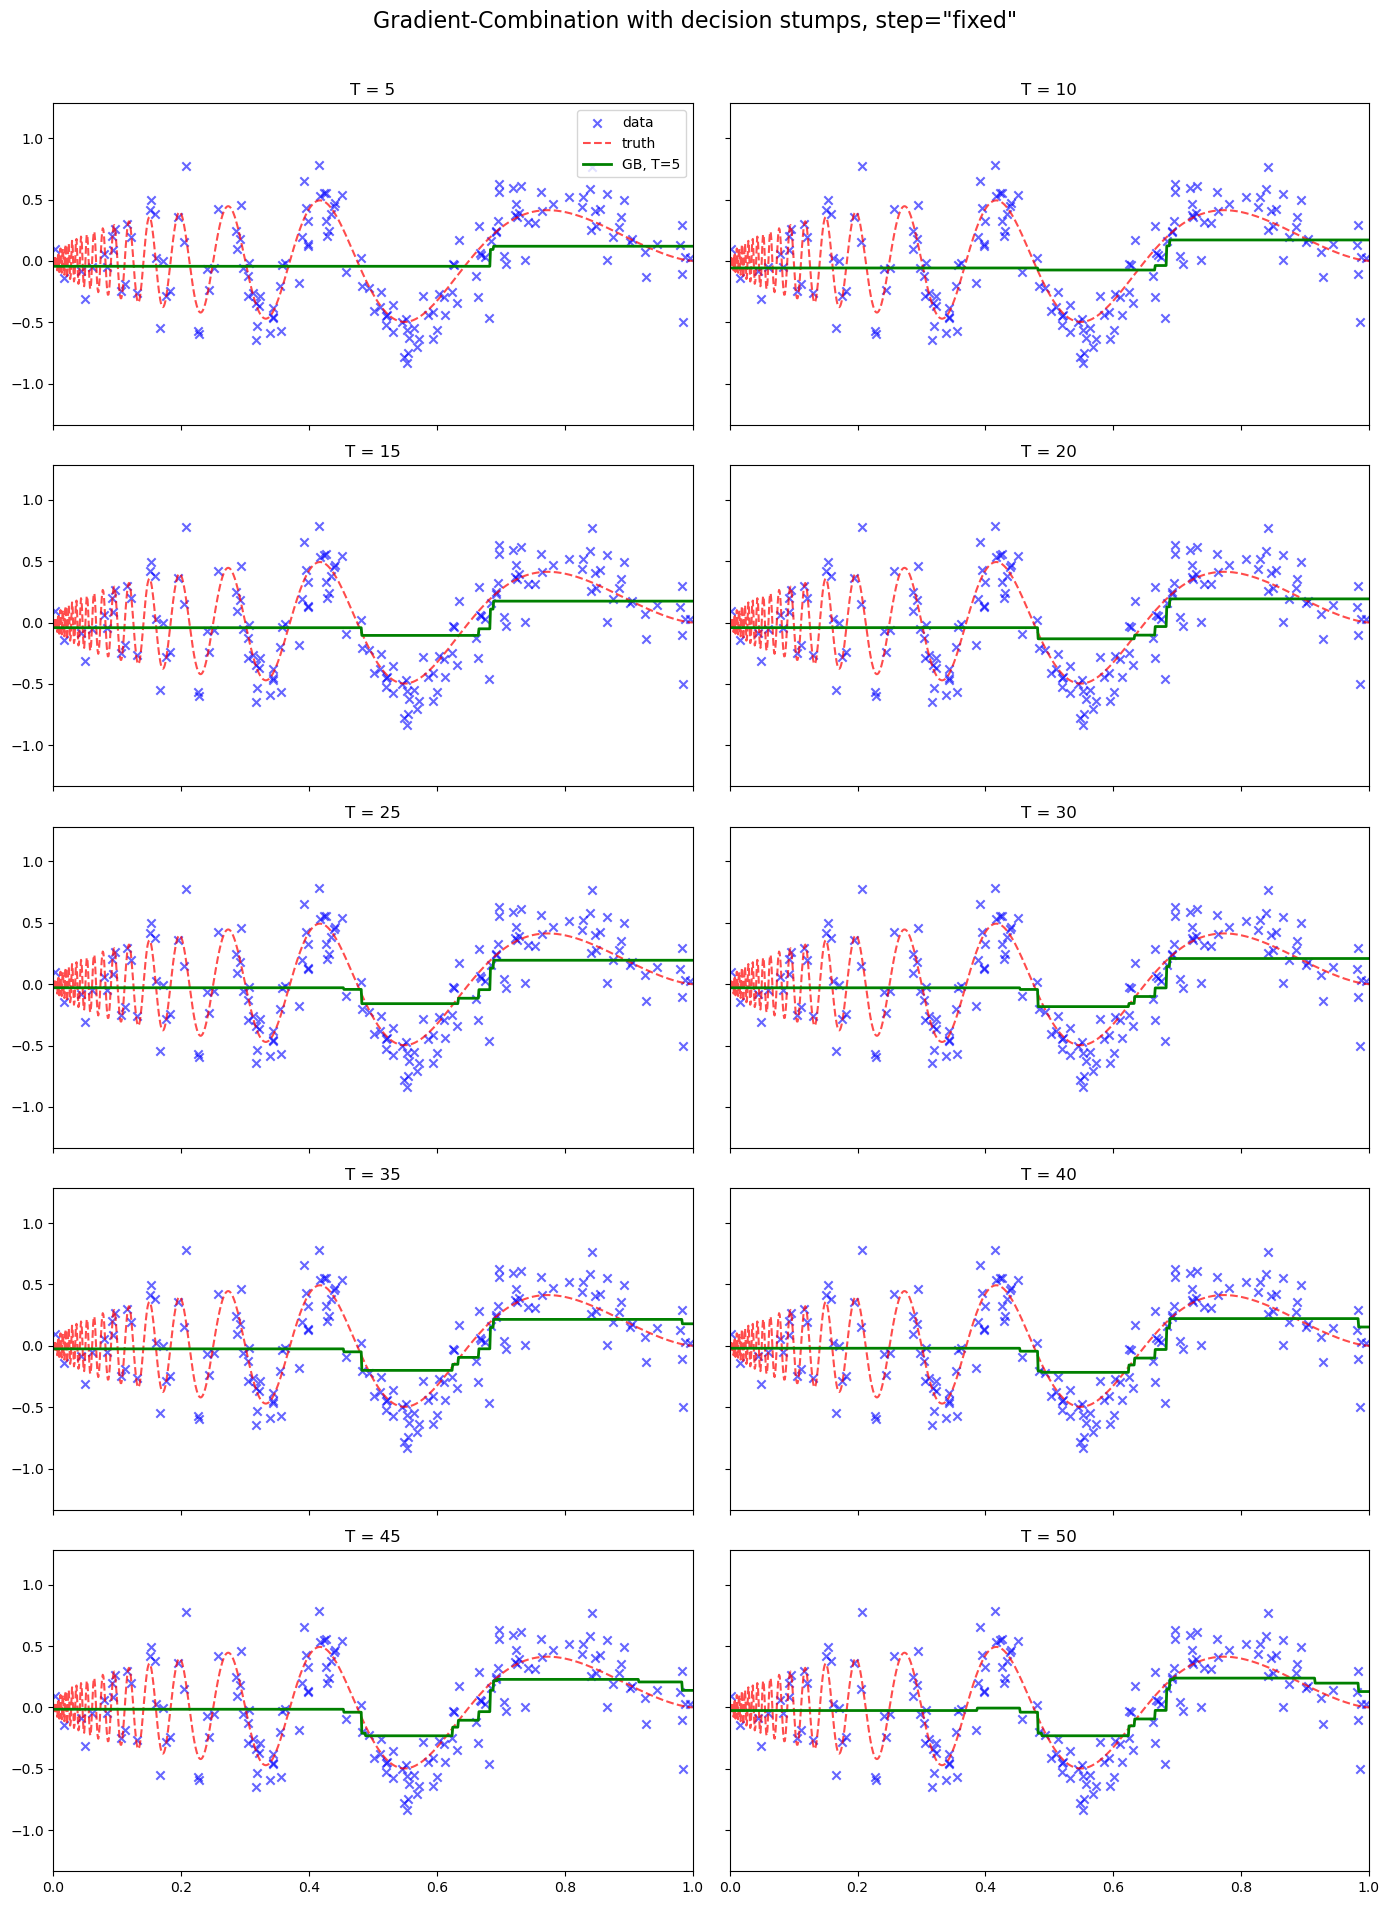

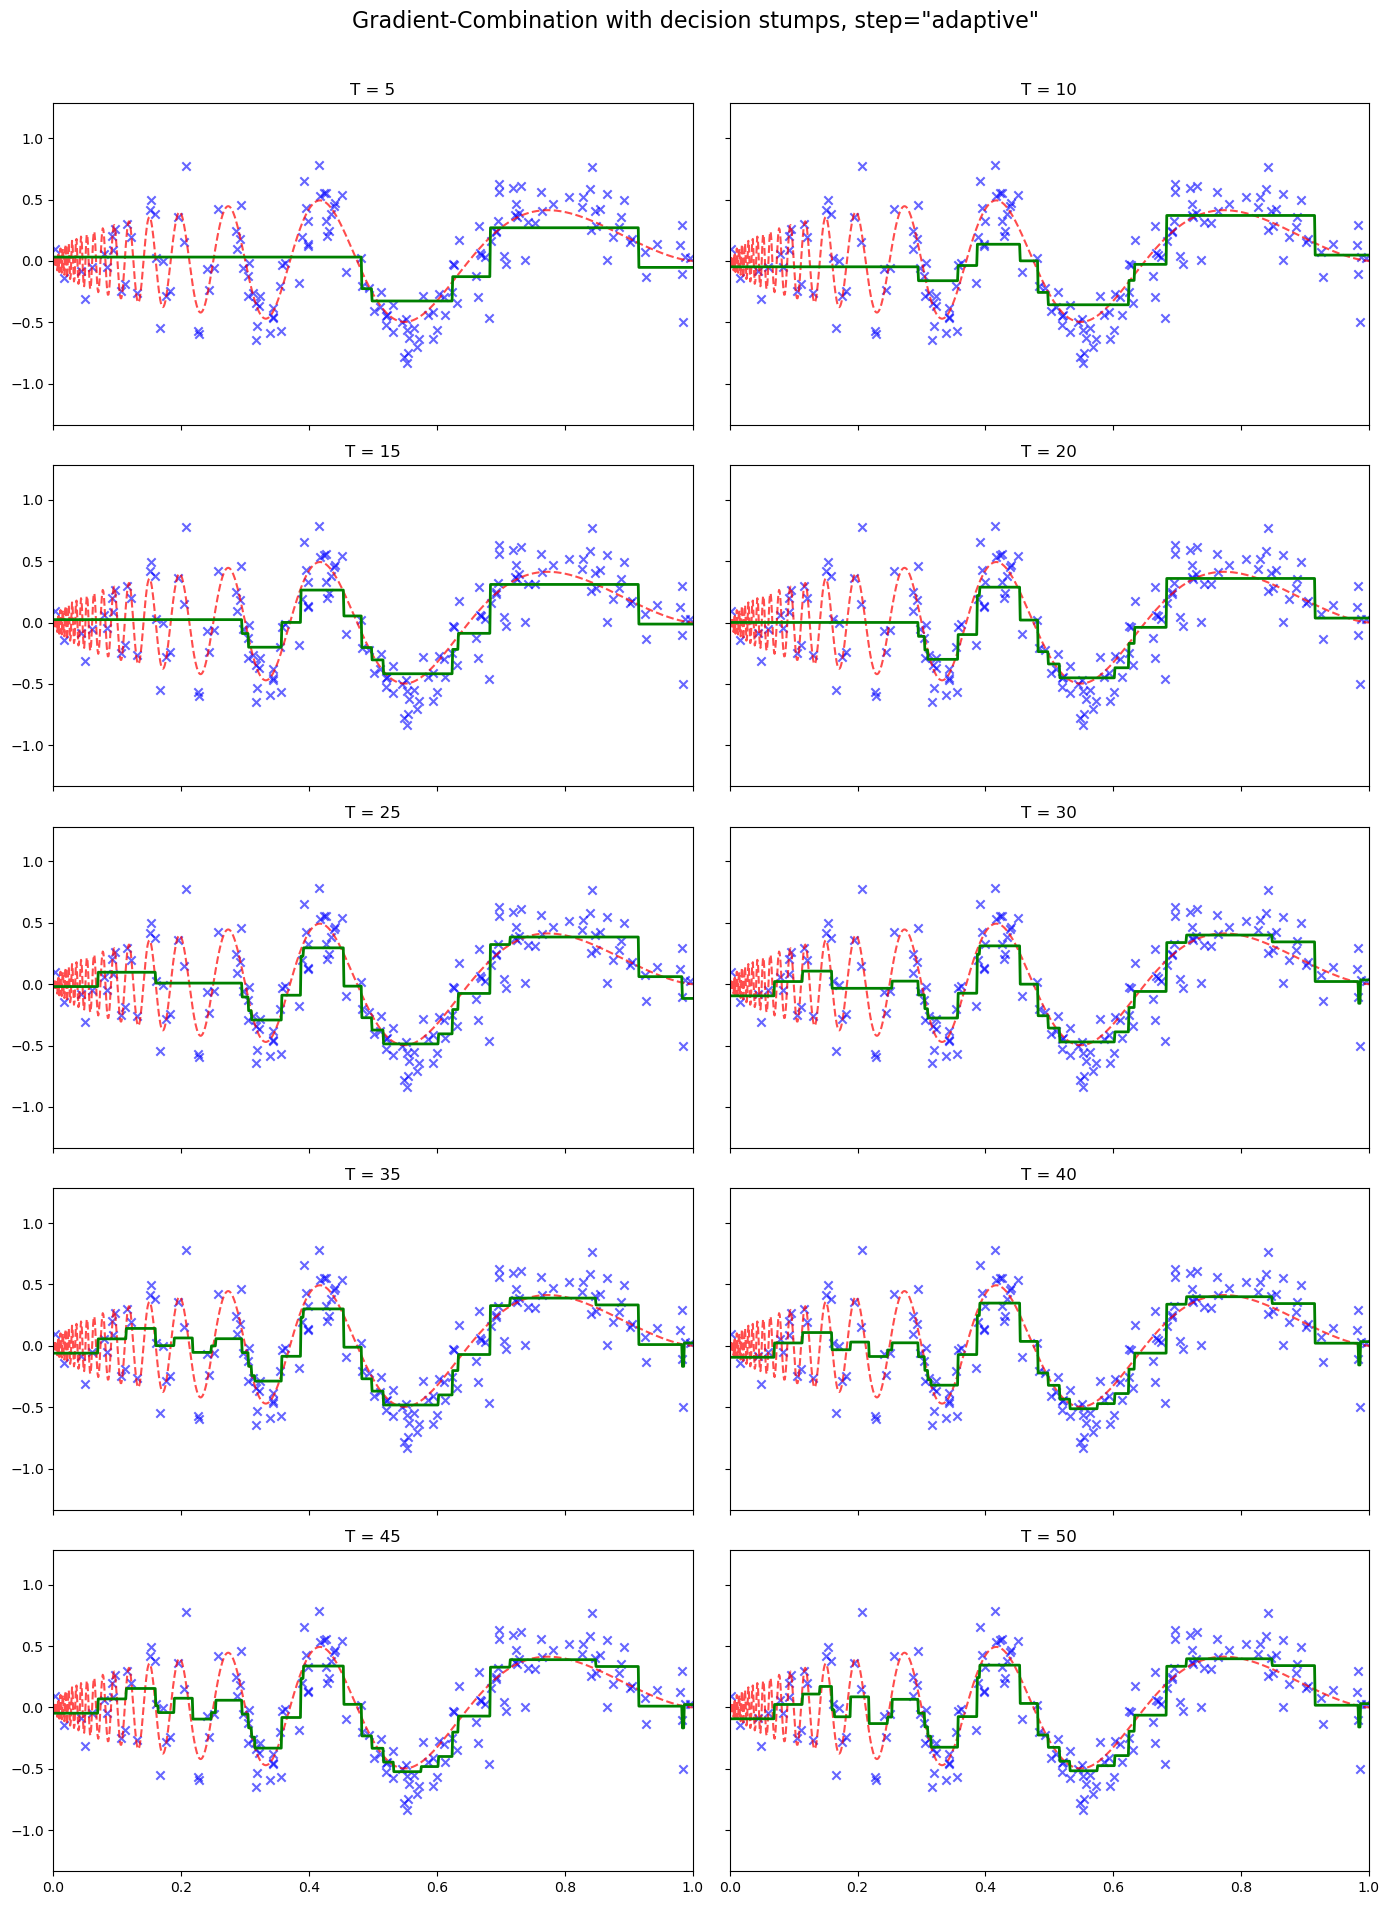

In [8]:
yy_true = f(xx.flatten())

def gradient_combination(X, y, xx, T, max_depth, step='fixed', alpha_fixed=0.1):
    n = X.shape[0]
    f_pred = np.zeros(n)
    f_grid = np.zeros_like(xx.flatten())
    models = []
    alphas = []
    
    for t in range(T):
        r = y - f_pred
        
        stump = DecisionTreeRegressor(max_depth=max_depth)
        stump.fit(X, r)
        h_train = stump.predict(X)
        h_grid = stump.predict(xx.reshape(-1, 1))
        
        if step == 'fixed':
            alpha = alpha_fixed
        else:
            alpha = np.dot(r, h_train) / np.dot(h_train, h_train)
        
        f_pred += alpha * h_train
        f_grid += alpha * h_grid
        
        models.append(stump)
        alphas.append(alpha)
    
    return f_grid

T_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for step in ['fixed', 'adaptive']:
    fig, axes = plt.subplots(5, 2, figsize=(14, 20), sharex=True, sharey=True)
    fig.suptitle(f'Gradient‐Combination with decision stumps, step="{step}"', fontsize=16)
    
    for ax, T in zip(axes.flat, T_list):
        yb = gradient_combination(X, y, xx, T=T, max_depth=1,
                                  step=step, alpha_fixed=0.1)
        
        ax.scatter(X, y, marker='x', color='blue', alpha=0.6, label='data')
        ax.plot(xx, yy_true, 'r--', alpha=0.7, label='truth')
        ax.plot(xx, yb, 'g-', lw=2, label=f'GB, T={T}')
        ax.set_xlim(0, 1)
        ax.set_ylim(np.min(y) - 0.5, np.max(y) + 0.5)
        ax.set_title(f'T = {T}')
        if (T == T_list[0] and step=='fixed'):
            ax.legend(loc='upper right')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

With the fixed step size, it underfits significantly, even at high T. The adaptive step size converges much faster and also fits the data much better. 

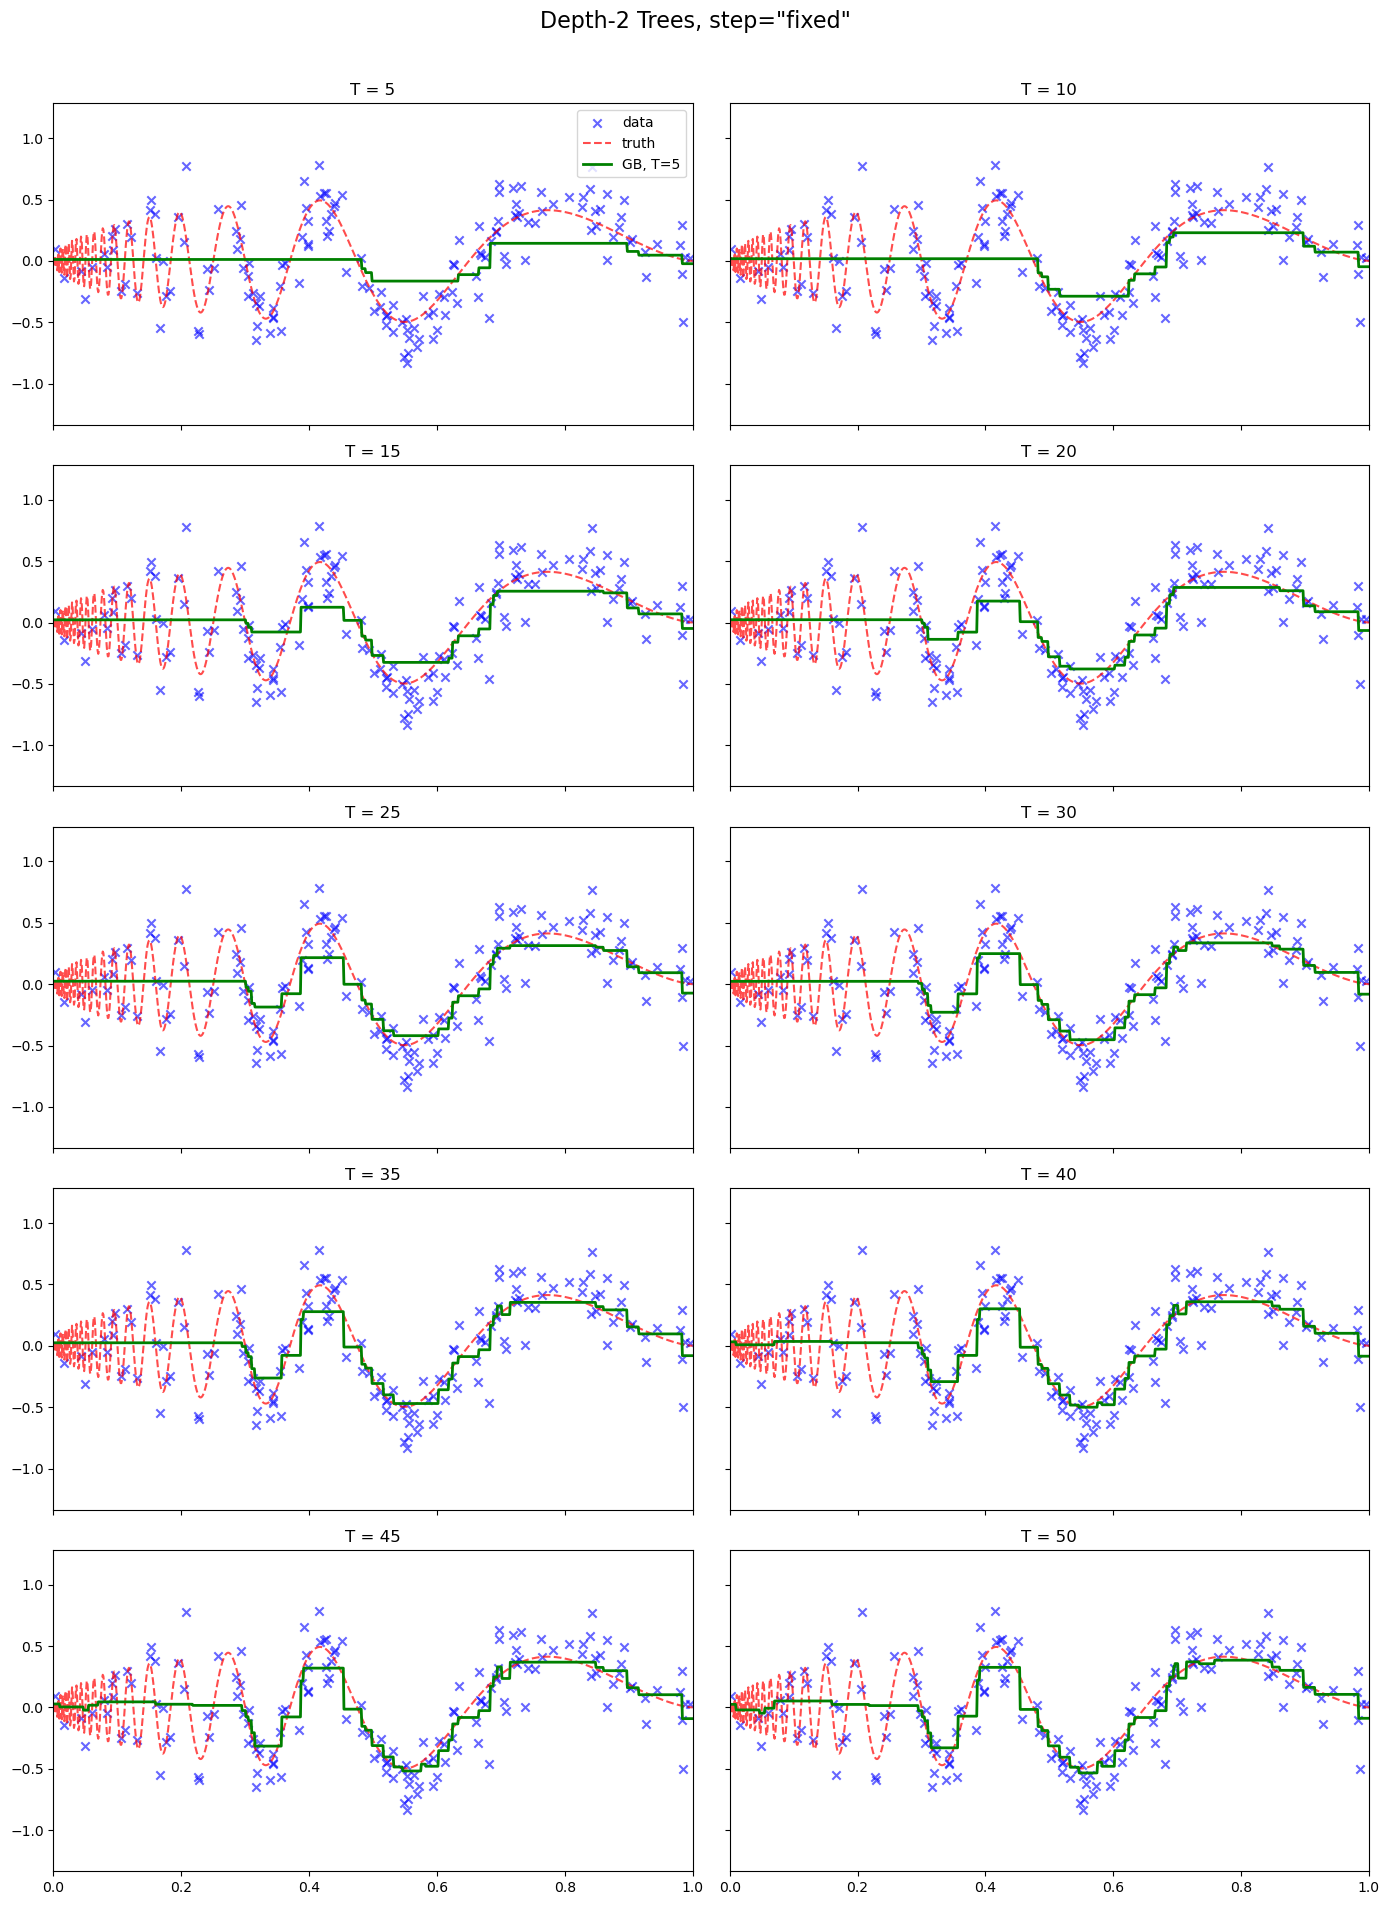

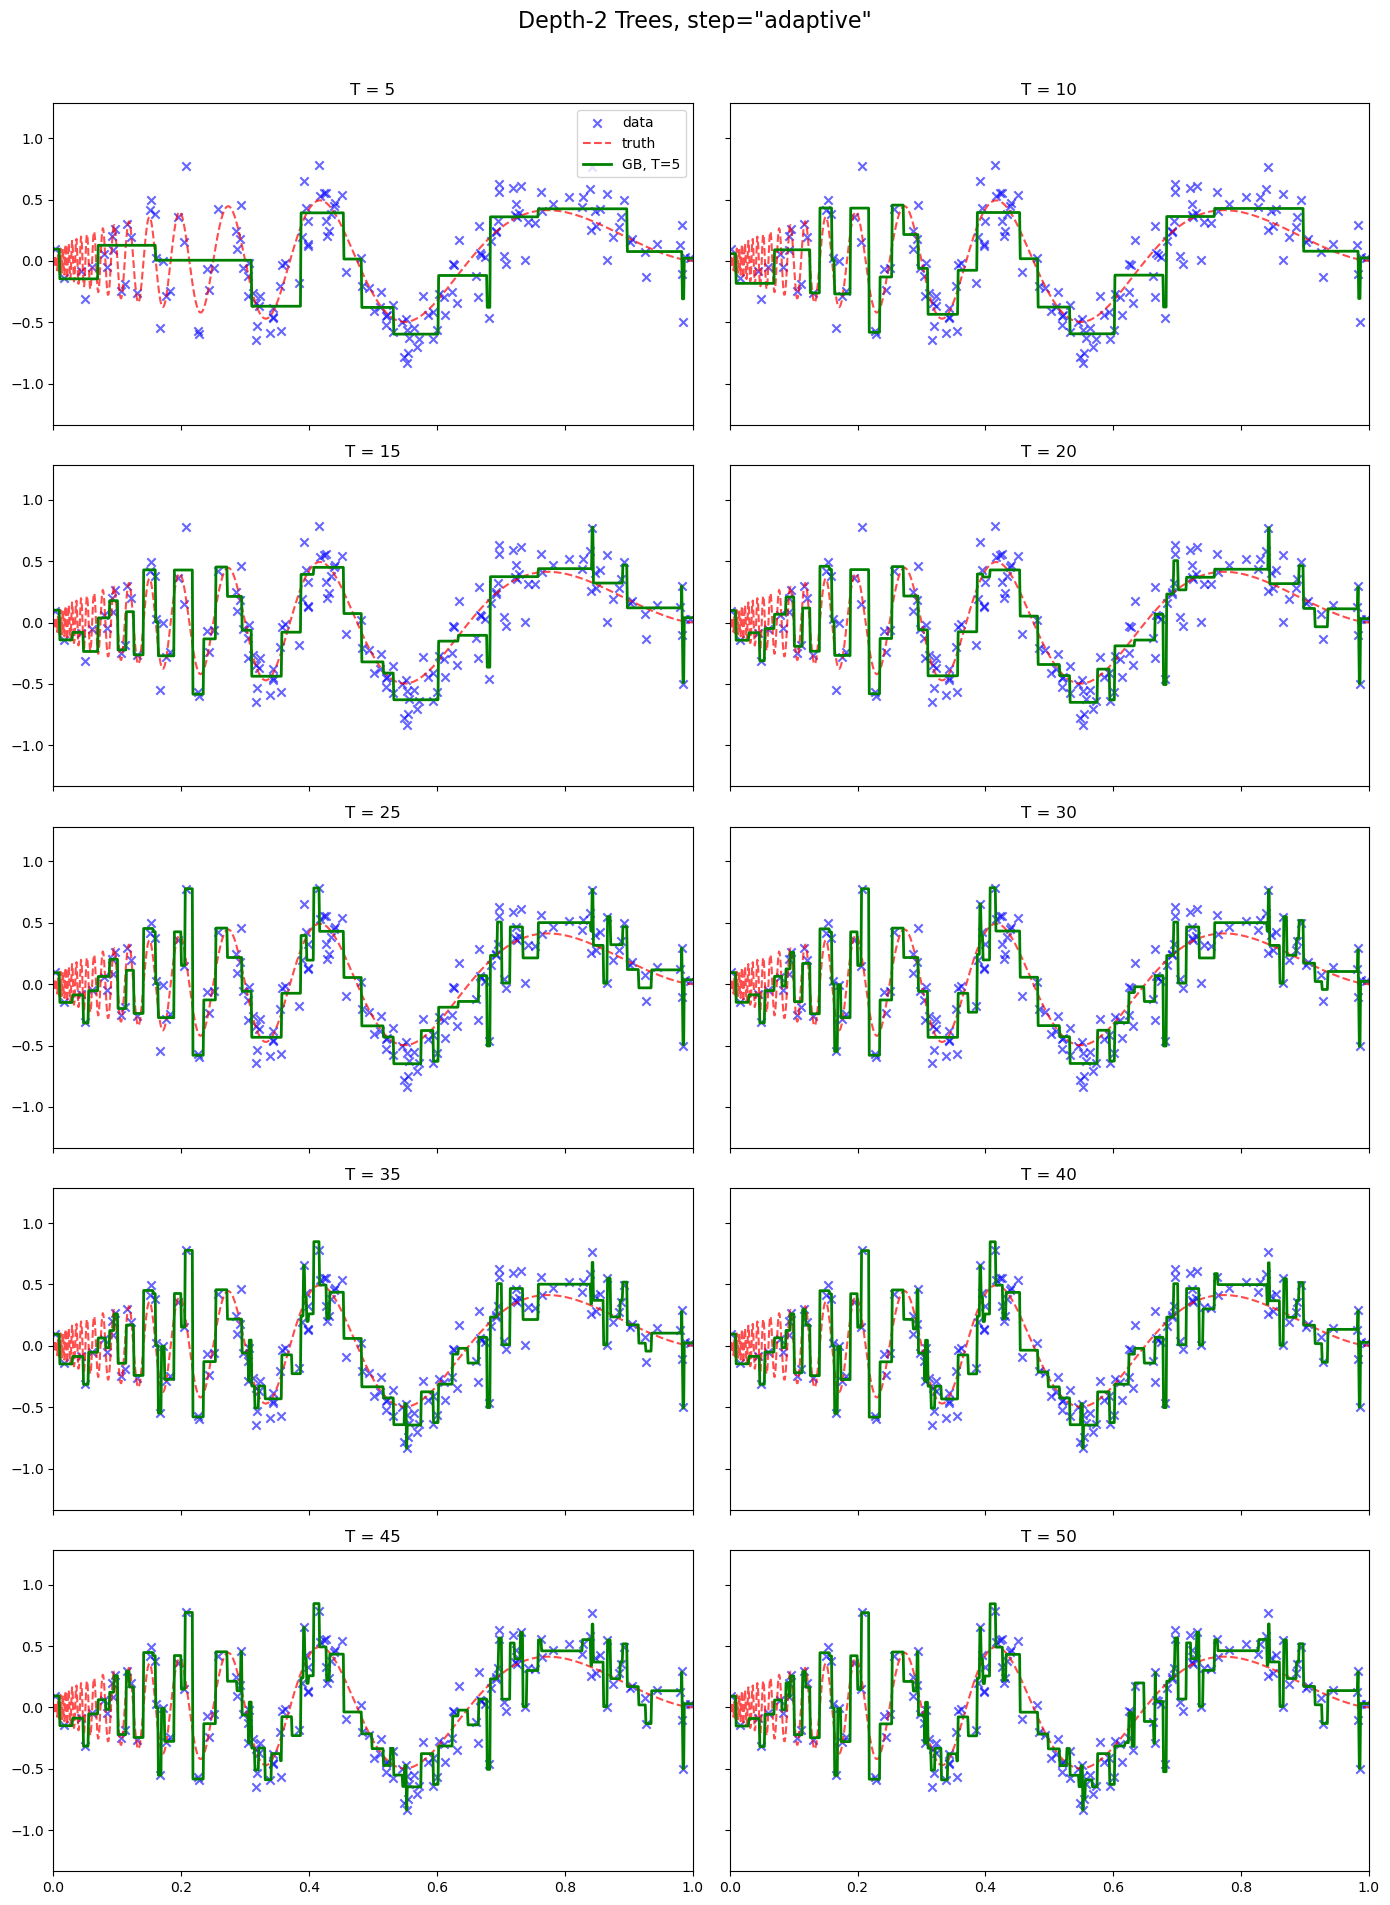

In [ ]:
T_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for step in ['fixed', 'adaptive']:
    fig, axes = plt.subplots(5, 2, figsize=(14, 20), sharex=True, sharey=True)
    fig.suptitle(f'Depth-2 Trees, step="{step}"', fontsize=16)
    
    for ax, T in zip(axes.flat, T_list):
        yb = gradient_combination(X, y, xx, T=T, max_depth=2,
                                  step=step, alpha_fixed=0.1)                                                                                  
        ax.scatter(X, y, marker='x', color='blue', alpha=0.6, label='data')
        ax.plot(xx.flatten(), yy_true, 'r--', alpha=0.7, label='truth')
        ax.plot(xx.flatten(), yb, 'g-', lw=2, label=f'GB, T={T}')
        ax.set_xlim(0, 1)
        ax.set_ylim(np.min(y) - 0.5, np.max(y) + 0.5)
        ax.set_title(f'T = {T}')
        if T == T_list[0]:
            ax.legend(loc='upper right')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

for a fixed alpha = 0.1, fit is piecewise constant but tracks the curvature well. adaptive alpha: each tree is stronger, so adaptive boosting zooms in on residuals very quickly. therefore, it ends up overfitting the data. 